## Piaskownica, trochę bawiłem się cyferkami i próbowałem różnych scenariuszy. Raczej ograniczyłbym się do kodu w listingach umieszczonych w artykule


In [ ]:
import optuna

In [2]:
def objective(trial):  #trial to obiekt typu optuna.Trial, który odpowiada jednemu wywołaniu funkcji 
    x = trial.suggest_float("x", -10, 10)   # sugerowane API z podaniem w tym wypadku przedziału do poszukiwań
    y = trial.suggest_float("y", -10, 10)   
    return (x - 3.1415) ** 2 + (y - 2.7182) ** 2  # output funkcji to fizyczna postać funkcji, którą chcemy optymalizować


In [ ]:
study = optuna.create_study()
study.optimize(objective, n_trials=100,)  # number of iterations

study.best_params


In [ ]:
study.optimize(objective, n_trials=100)
study.best_params
# {'x': 3.12812598202653, 'y': -2.7052339395081297}

In [6]:
study.best_params


{'x': 3.077057276644338, 'y': 2.7262451689217335}

In [2]:
def objective2(trial):
    x = trial.suggest_float("x", -10, 2)
    y = trial.suggest_float("y", -10, 2)
    return (x - 3.1415) ** 2 + (y - 2.7182) ** 2

In [ ]:
study2 = optuna.create_study()
study2.optimize(objective2, n_trials=200,)  # number of iterations

study2.best_params

In [2]:
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_validate, train_test_split
import pandas as pd

# Load data
penguins = sns.load_dataset("penguins").dropna()
X, y = penguins.drop("body_mass_g", axis=1), penguins[["body_mass_g"]]

# OH encode categoricals
X = pd.get_dummies(X)

# Init model with defaults
gr_reg = GradientBoostingRegressor(random_state=1121218)

kf = KFold(n_splits=5, shuffle=True, random_state=1121218)
scores = cross_validate(
    gr_reg, X, y, cv=kf, scoring="neg_mean_squared_log_error", n_jobs=-1
)

In [3]:
def objective(trial, X, y, cv, scoring):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 5000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 9),
        "subsample": trial.suggest_float("subsample", 0.5, 0.9, step=0.1),
        "max_features": trial.suggest_categorical(
            "max_features", ["auto", "sqrt", "log2"]
        ),
        "random_state": 1121218,
        "n_iter_no_change": 50,  # early stopping
        "validation_fraction": 0.05,
    }
    # Perform CV
    gr_reg = GradientBoostingRegressor(**params)
    scores = cross_validate(gr_reg, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    # Compute RMSLE
    rmsle = np.sqrt(-scores["test_score"].mean())

    return rmsle

In [4]:
import numpy as np
rmsle = np.sqrt(-scores["test_score"].mean())
print(f"Bazowy RMSLE: {rmsle:.5f}")

Bazowy RMSLE: 0.07573


In [9]:
%%time

# Create study that minimizes
study = optuna.create_study(direction="minimize")

# Wrap the objective inside a lambda with the relevant arguments
kf = KFold(n_splits=5, shuffle=True, random_state=1121218)
# Pass additional arguments inside another function
func = lambda trial: objective(trial, X, y, cv=kf, scoring="neg_mean_squared_log_error")

# Start optimizing with 100 trials
study.optimize(func, n_trials=100)

[I 2022-10-01 21:48:12,794] A new study created in memory with name: no-name-464edbcd-92b3-4816-a280-d5a269aa3233
[I 2022-10-01 21:48:14,134] Trial 0 finished with value: 0.11319930339553956 and parameters: {'n_estimators': 200, 'learning_rate': 0.003499958957504843, 'max_depth': 7, 'subsample': 0.7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.11319930339553956.
[I 2022-10-01 21:48:15,098] Trial 1 finished with value: 0.08393382457857619 and parameters: {'n_estimators': 700, 'learning_rate': 0.2691792552497422, 'max_depth': 9, 'subsample': 0.9, 'max_features': 'log2'}. Best is trial 1 with value: 0.08393382457857619.
[I 2022-10-01 21:48:15,884] Trial 2 finished with value: 0.08657997861227738 and parameters: {'n_estimators': 2400, 'learning_rate': 0.08826636667503956, 'max_depth': 9, 'subsample': 0.5, 'max_features': 'log2'}. Best is trial 1 with value: 0.08393382457857619.
[I 2022-10-01 21:48:18,129] Trial 3 finished with value: 0.11902667847287583 and parameters: {'n_estim

Wall time: 22.7 s


In [6]:
print(f"Base RMSLE     : {rmsle:.5f}")
print(f"Optimized RMSLE: {study.best_value:.5f}")

Base RMSLE     : 0.07573
Optimized RMSLE: 0.07177


In [10]:
%%time

study.optimize(func, n_trials=289)
# CPU times: total: 6.48 s
# Wall time: 36.6 s

[I 2022-10-01 21:48:43,776] Trial 100 finished with value: 0.0715473272855356 and parameters: {'n_estimators': 100, 'learning_rate': 0.03654027334807939, 'max_depth': 3, 'subsample': 0.7, 'max_features': 'log2'}. Best is trial 100 with value: 0.0715473272855356.
[I 2022-10-01 21:48:43,811] Trial 101 finished with value: 0.07313110047620763 and parameters: {'n_estimators': 100, 'learning_rate': 0.07472556486771717, 'max_depth': 3, 'subsample': 0.7, 'max_features': 'log2'}. Best is trial 100 with value: 0.0715473272855356.
[I 2022-10-01 21:48:43,930] Trial 102 finished with value: 0.07172942696162085 and parameters: {'n_estimators': 400, 'learning_rate': 0.03669967832146492, 'max_depth': 3, 'subsample': 0.7, 'max_features': 'log2'}. Best is trial 100 with value: 0.0715473272855356.
[I 2022-10-01 21:48:44,010] Trial 103 finished with value: 0.0722196637456368 and parameters: {'n_estimators': 400, 'learning_rate': 0.040302391918010834, 'max_depth': 3, 'subsample': 0.7, 'max_features': 'log

Wall time: 24.1 s


In [11]:
print("Best params:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

# Best params:
#    n_estimators: 800
#    learning_rate: 0.036401013416333255
#    max_depth: 3
#    subsample: 0.7
#    max_features: sqrt

Best params:
	n_estimators: 500
	learning_rate: 0.03465846379886505
	max_depth: 3
	subsample: 0.7
	max_features: log2


In [13]:
print(f"Base RMSLE     : {rmsle:.5f}")
print(f"Optimized RMSLE: {study.best_value:.5f}")
# Base RMSLE     : 0.07573
# Optimized RMSLE: 0.07139

Base RMSLE     : 0.07573
Optimized RMSLE: 0.07139


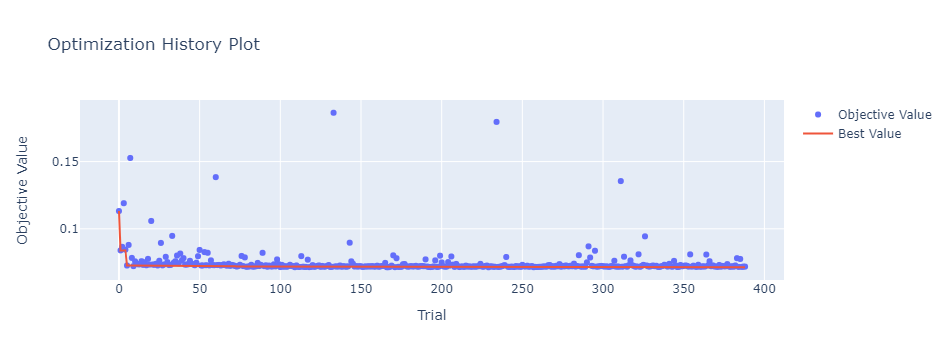

In [14]:
from optuna.visualization import plot_optimization_history

plotly_config = {"staticPlot": True}

fig = plot_optimization_history(study)
# conda install -c plotly plotly-orca
fig.write_image(r'E:\page ds\pages\Optymalizatory_hiperparametrow\foto\1_OptunaHistoryPlot.png', format="png", engine = "orca")
# fig.write_html(r'E:\page ds\pages\Optymalizatory_hiperparametrow\foto\1_OptunaHistoryPlot.html')
fig.show(config=plotly_config)



In [11]:
import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

import optuna

# You can use Matplotlib instead of Plotly for visualization by simply replacing `optuna.visualization` with
# `optuna.visualization.matplotlib` in the following examples.
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

SEED = 128262

np.random.seed(SEED)

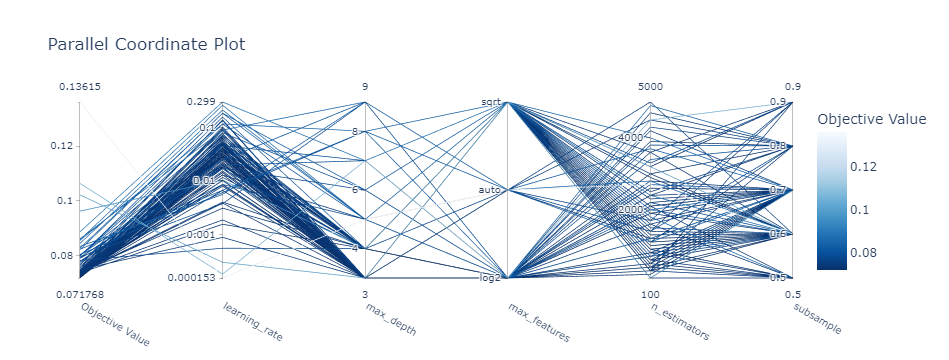

In [8]:
from optuna.visualization import plot_parallel_coordinate
plotly_config = {"staticPlot": True}
fig_pc = plot_parallel_coordinate(study)
# conda install -c plotly plotly-orca
#fig_pc.to_image(format="png", engine="orca")
fig_pc.write_image(r'E:\page ds\pages\Optymalizatory_hiperparametrow\foto\2_OptunaParallelCoordinate.png' , format="png", engine = "orca")
fig_pc.show(config = plotly_config)



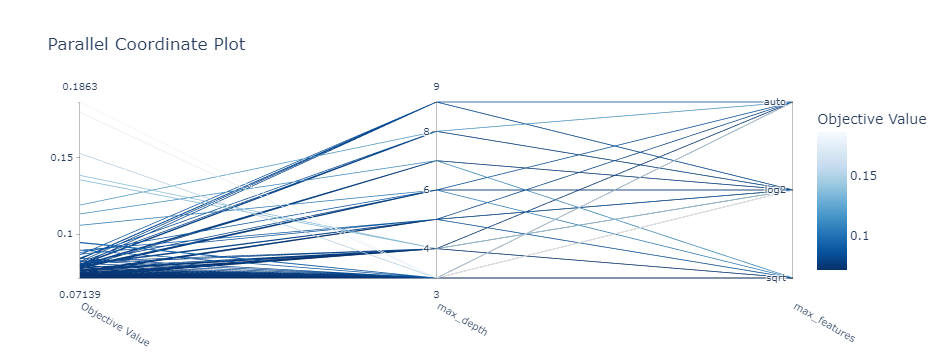

In [16]:
fig_pcp = plot_parallel_coordinate(study, params=["max_depth", "max_features"])
plotly_config = {"staticPlot": True}
fig_pcp.write_image(r'E:\page ds\pages\Optymalizatory_hiperparametrow\foto\3_OptunaParallelCoordinate_part.png' , format="png", engine = "orca")
fig_pcp.show(config = plotly_config)


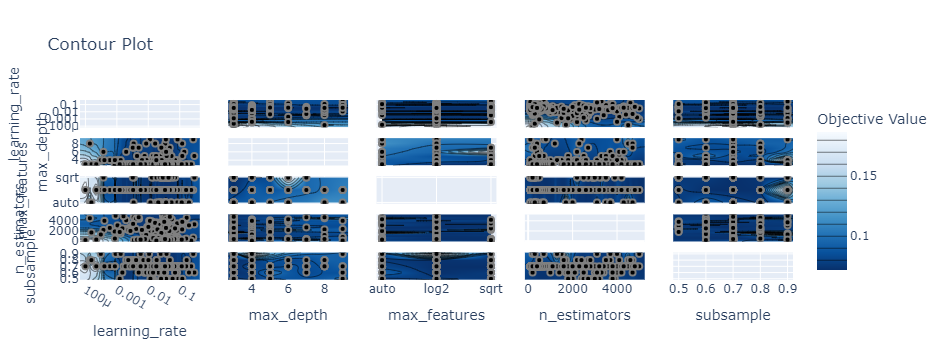

In [17]:
from optuna.visualization import plot_contour
plot_contour(study)


In [ ]:
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_slice

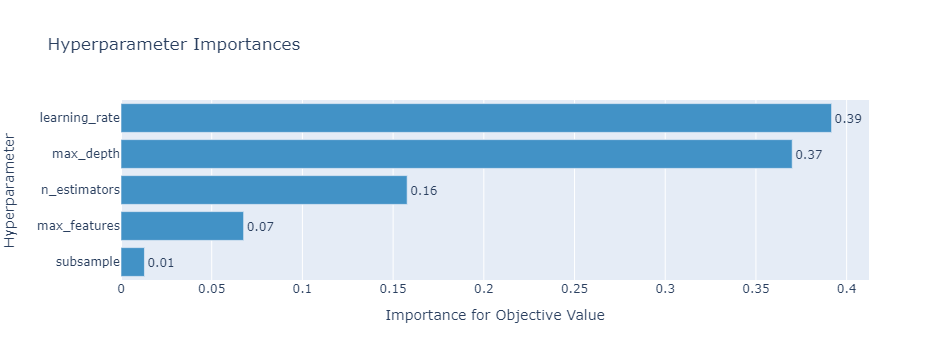

In [19]:
from optuna.visualization import plot_param_importances
fig_pi = plot_param_importances(study)
plotly_config = {"staticPlot": True}
fig_pi.write_image(r'E:\page ds\pages\Optymalizatory_hiperparametrow\foto\4_OptunaParamImport.png' , format="png", engine = "orca")
#fig_pi.write_html(r'E:\page ds\pages\Optymalizatory_hiperparametrow\foto\4_OptunaParamImport.html')
fig_pi.show(config = plotly_config) 

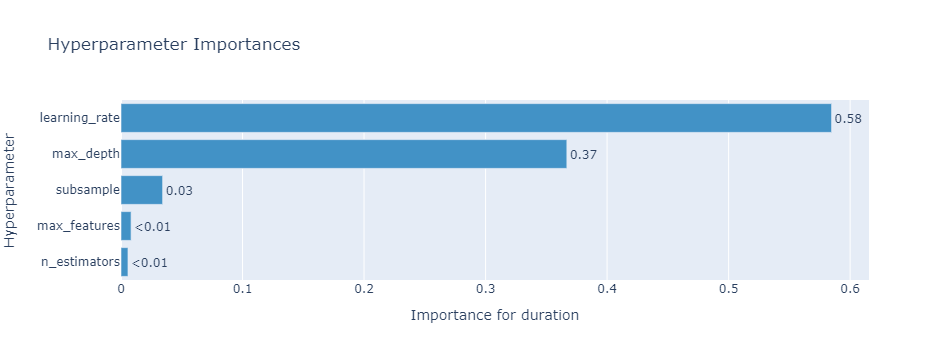

In [20]:
#sprawdzamy, które hiperparametry wpływają na czas trwania próby 
fig_pit = optuna.visualization.plot_param_importances(
    study, target=lambda t: t.duration.total_seconds(), target_name="duration"
)
plotly_config = {"staticPlot": True}
fig_pit.write_image(r'E:\page ds\pages\Optymalizatory_hiperparametrow\foto\4_OptunaParamImport_dur.png' , format="png", engine = "orca")
fig_pit.show(config = plotly_config)
